# Neural Network

In [38]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from datetime import date
date.today()

datetime.date(2018, 5, 2)

In [40]:
author = "kyubyong. https://github.com/Kyubyong/tensorflow-exercises"

In [41]:
tf.__version__

'1.5.0'

In [42]:
np.__version__

'1.14.1'

# Activation Functions

Q1. Apply `relu`, `elu`, and `softplus` to `x`.

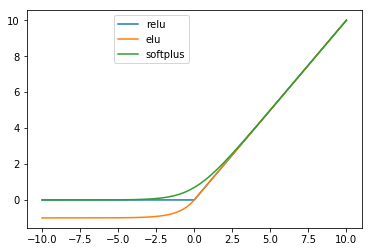

In [43]:
_x = np.linspace(-10., 10., 1000)
x = tf.convert_to_tensor(_x)

relu = tf.nn.relu(x)
elu = tf.nn.elu(x)
softplus = tf.nn.softplus(x)

with tf.Session() as sess:
    _relu, _elu, _softplus = sess.run([relu, elu, softplus])
    plt.plot(_x, _relu, label='relu')
    plt.plot(_x, _elu, label='elu')
    plt.plot(_x, _softplus, label='softplus')
    plt.legend(bbox_to_anchor=(0.5, 1.0))
    plt.show()

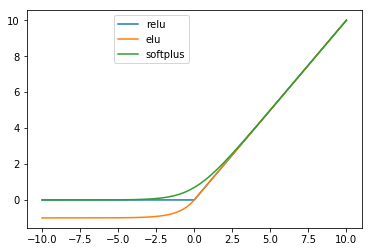

In [44]:
_x = np.linspace(-10., 10., 1000)
x = tf.convert_to_tensor(_x)

relu = tf.nn.relu(x)
elu = tf.nn.elu(x)
softplus = tf.nn.softplus(x)

with tf.Session() as sess:
    _relu, _elu, _softplus = sess.run([relu, elu, softplus])
    plt.plot(_x, _relu, label='relu')
    plt.plot(_x, _elu, label='elu')
    plt.plot(_x, _softplus, label='softplus')
    plt.legend(bbox_to_anchor=(0.5, 1.0))
    plt.show()

Q2. Apply `sigmoid` and `tanh` to x.

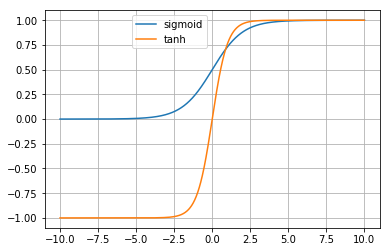

In [45]:
_x = np.linspace(-10., 10., 1000)
x = tf.convert_to_tensor(_x)

sigmoid = tf.nn.sigmoid(x)
tanh = tf.nn.tanh(x)

with tf.Session() as sess:
    _sigmoid, _tanh = sess.run([sigmoid, tanh])
    plt.plot(_x, _sigmoid, label='sigmoid')
    plt.plot(_x, _tanh, label='tanh')
    plt.legend(bbox_to_anchor=(0.5, 1.0))
    plt.grid()
    plt.show()

Q3. Apply `softmax` to x.

In [46]:
_x = np.array([[1, 2, 4, 8], [2, 4, 6, 8]], dtype=np.float32)
x = tf.convert_to_tensor(_x)
out = tf.nn.softmax(x)
with tf.Session() as sess:
    _out = sess.run(out)
    print(_out)    
    assert np.allclose(np.sum(_out, axis=-1), 1)

[[8.9250901e-04 2.4260911e-03 1.7926522e-02 9.7875494e-01]
 [2.1440089e-03 1.5842201e-02 1.1705890e-01 8.6495483e-01]]


Q4. Apply `dropout` with keep_prob=.5 to x.

In [47]:
_x = np.array([[1, 2, 4, 8], [2, 4, 6, 8]], dtype=np.float32)
print("_x =\n" , _x)
x = tf.convert_to_tensor(_x)
out = tf.nn.dropout(x, keep_prob=.5)
with tf.Session() as sess:
    _out = sess.run(out)
    print("_out =\n", _out) 

_x =
 [[1. 2. 4. 8.]
 [2. 4. 6. 8.]]
_out =
 [[ 2.  0.  8.  0.]
 [ 0.  0. 12. 16.]]


# Fully Connected

Q5. Apply a fully connected layer to x with 2 outputs and then an sigmoid function.

In [48]:
x = tf.random_normal([8, 10])

out = tf.contrib.layers.fully_connected(x, num_outputs=2, activation_fn=tf.nn.sigmoid)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(out))

[[0.44073907 0.8231775 ]
 [0.58938086 0.89759624]
 [0.5546108  0.31480485]
 [0.67286104 0.5610948 ]
 [0.43180588 0.5350655 ]
 [0.6719707  0.6204127 ]
 [0.16489685 0.786591  ]
 [0.9447584  0.3589393 ]]


In [49]:
help(tf.contrib.layers.fully_connected)

Help on function fully_connected in module tensorflow.contrib.layers.python.layers.layers:

fully_connected(inputs, num_outputs, activation_fn=<function relu at 0x7f4d8f596ea0>, normalizer_fn=None, normalizer_params=None, weights_initializer=<function variance_scaling_initializer.<locals>._initializer at 0x7f4d3c6bed90>, weights_regularizer=None, biases_initializer=<tensorflow.python.ops.init_ops.Zeros object at 0x7f4d3c771d30>, biases_regularizer=None, reuse=None, variables_collections=None, outputs_collections=None, trainable=True, scope=None)
    Adds a fully connected layer.
    
    `fully_connected` creates a variable called `weights`, representing a fully
    connected weight matrix, which is multiplied by the `inputs` to produce a
    `Tensor` of hidden units. If a `normalizer_fn` is provided (such as
    `batch_norm`), it is then applied. Otherwise, if `normalizer_fn` is
    None and a `biases_initializer` is provided then a `biases` variable would be
    created and added the

## Convolution

Q6. Apply 2 kernels of width-height (2, 2), stride 1, and same padding to x.

In [64]:
tf.reset_default_graph()

In [60]:
x = tf.random_uniform(shape=(2, 3, 3, 3), dtype=tf.float32)
filter = tf.get_variable("filter", shape=(2, 2, 3, 2), dtype=tf.float32, 
                    initializer=tf.random_uniform_initializer())
out = tf.nn.conv2d(x, filter, strides=[1, 1, 1, 1], padding="SAME")
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    _out = sess.run(out)
    print(_out.shape)

(2, 3, 3, 2)


Q7. Apply 3 kernels of width-height (2, 2), stride 1, dilation_rate 2 and valid padding to x.

In [61]:
tf.reset_default_graph()

In [65]:
x = tf.random_uniform(shape=(4, 10, 10, 3), dtype=tf.float32)
filter = tf.get_variable("filter", shape= (3, 2, 3, 2), dtype=tf.float32, 
                    initializer=tf.random_uniform_initializer())
out = tf.nn.conv2d(x, filter, strides=[1,1,1,1], padding="SAME")
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    _out = sess.run(out)
    print(_out.shape)

(4, 10, 10, 2)


Q8. Apply 4 kernels of width-height (3, 3), stride 2, and same padding to x.

In [81]:
tf.reset_default_graph()

In [82]:
x = tf.random_uniform(shape=(4, 10, 10, 5), dtype=tf.float32)
filter = tf.get_variable("filter", shape=(3, 3, 5, 4), dtype=tf.float32, 
                    initializer=tf.random_uniform_initializer())
out = tf.nn.conv2d(x, filter, strides=[1,2,2,1], padding="SAME")
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    _out = sess.run(out)
    print(_out.shape)

(4, 5, 5, 4)


Q9. Apply 4 times of kernels of width-height (3, 3), stride 2, and same padding to x, depth-wise.

In [88]:
tf.reset_default_graph()

In [89]:
x = tf.random_uniform(shape=(4, 10, 10, 5), dtype=tf.float32)
filter = tf.get_variable("filter", shape=(3, 3, 5, 4), dtype=tf.float32, 
                    initializer=tf.random_uniform_initializer())
out = tf.nn.depthwise_conv2d(x, filter, strides=[1,2,2,1], padding="SAME")
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    _out = sess.run(out)
    print(_out.shape)

(4, 5, 5, 20)


Q10. Apply 5 kernels of height 3, stride 2, and valid padding to x.

In [99]:
tf.reset_default_graph()

In [100]:
x = tf.random_uniform(shape=(4, 10, 5), dtype=tf.float32)
filter = tf.get_variable("filter", shape=(3, 5, 5), dtype=tf.float32, 
                    initializer=tf.random_uniform_initializer())
out = tf.nn.conv1d(x, filter, stride=2, padding="VALID")
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    _out = sess.run(out)
    print(_out.shape)

(4, 4, 5)


Q11. Apply conv2d transpose with 5 kernels of width-height (3, 3), stride 2, and same padding to x.

In [17]:
tf.reset_default_graph()

In [18]:
x = tf.random_uniform(shape=(4, 5, 5, 4), dtype=tf.float32)
filter = tf.get_variable("filter", shape=..., dtype=tf.float32, 
                    initializer=tf.random_uniform_initializer())
shp = x.get_shape().as_list()
print(shp)
output_shape = ...
out = ...
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    _out = sess.run(out)
    print(_out.shape)

(4, 10, 10, 5)


Q12. Apply conv2d transpose with 5 kernels of width-height (3, 3), stride 2, and valid padding to x.

In [19]:
tf.reset_default_graph()

In [2]:
x = tf.random_uniform(shape=(4, 5, 5, 4), dtype=tf.float32)
filter = tf.get_variable("filter", shape=(3, 3, 5, 4), dtype=tf.float32, 
                    initializer=tf.random_uniform_initializer())
shp = x.get_shape().as_list()
output_shape = ...
out = ...
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    _out = sess.run(out)
    print(_out.shape)

(4, 11, 11, 5)


Q13. Apply max pooling and average pooling of window size 2, stride 1, and valid padding to x.

In [35]:
_x = np.zeros((1, 3, 3, 3), dtype=np.float32)
_x[0, :, :, 0] = np.arange(1, 10, dtype=np.float32).reshape(3, 3)
_x[0, :, :, 1] = np.arange(10, 19, dtype=np.float32).reshape(3, 3)
_x[0, :, :, 2] = np.arange(19, 28, dtype=np.float32).reshape(3, 3)
print("1st channel of x =\n", _x[:, :, :, 0])
print("\n2nd channel of x =\n", _x[:, :, :, 1])
print("\n3rd channel of x =\n", _x[:, :, :, 2])
x = tf.constant(_x)

maxpool = ...
avgpool = ...
with tf.Session() as sess:
    _maxpool, _avgpool = sess.run([maxpool, avgpool])
    print("\n1st channel of max pooling =\n", _maxpool[:, :, :, 0])
    print("\n2nd channel of max pooling =\n", _maxpool[:, :, :, 1])
    print("\n3rd channel of max pooling =\n", _maxpool[:, :, :, 2])
    print("\n1st channel of avg pooling =\n", _avgpool[:, :, :, 0])
    print("\n2nd channel of avg pooling =\n", _avgpool[:, :, :, 1])
    print("\n3rd channel of avg pooling =\n", _avgpool[:, :, :, 2])

1st channel of x =
 [[[ 1.  2.  3.]
  [ 4.  5.  6.]
  [ 7.  8.  9.]]]

2nd channel of x =
 [[[ 10.  11.  12.]
  [ 13.  14.  15.]
  [ 16.  17.  18.]]]

3rd channel of x =
 [[[ 19.  20.  21.]
  [ 22.  23.  24.]
  [ 25.  26.  27.]]]

1st channel of max pooling =
 [[[ 5.  6.]
  [ 8.  9.]]]

2nd channel of max pooling =
 [[[ 14.  15.]
  [ 17.  18.]]]

3rd channel of max pooling =
 [[[ 23.  24.]
  [ 26.  27.]]]

1st channel of avg pooling =
 [[[ 3.  4.]
  [ 6.  7.]]]

2nd channel of avg pooling =
 [[[ 12.  13.]
  [ 15.  16.]]]

3rd channel of avg pooling =
 [[[ 21.  22.]
  [ 24.  25.]]]
